In [3]:
%matplotlib inline   
                     # this sets up matplotlib to make plots show up in the notebook
import numpy as np   # imports the numpy package, abbreviated as np
import matplotlib    # imports the matplotlib package for making plots
import matplotlib.pyplot as plt    # imports the part of matplotlib we use most,
                                   #abbreviated as plt
    
import scipy.stats as stats
import astropy.stats as astats
import numpy.random as random


# Exploring measurements of the Hubble parameter



In [4]:
from astropy.table import Table
import pandas

# Reading in an ASCII file

See https://pandas.pydata.org/pandas-docs/stable/reference/io.html for `pandas` format options (or http://docs.astropy.org/en/stable/io/unified.html#table-io for `Table.read()` format options). If you have a file that only reads in via astropy, you can convert to a `pandas` DataFrame via the `.to_pandas()` method of an astropy recarray.


__1) using the below code box (or a text file viewer) look at the contents of the file H0_data.txt__

In [5]:
!cat H0_data.txt


Index	H0	error_plus	error_minus	year	Dataset	Reference
0	67.27	0.6	-0.6	2020.0	Planck CMB	Planck:2018vyg
1	67.36	0.54	-0.54	2020.0	Planck CMB+lensing	Planck:2018vyg
2	67.49	0.53	-0.53	2021.0	Planck+SPT+ACT CMB	SPT-3G:2021wgf
3	69.6	1.8	-1.8	2020.0	eBOSS+Planck CMB	Pogosian:2020ded
4	68.8	1.5	-1.5	2021.0	SPT-3G CMB	SPT-3G:2021eoc
5	67.9	1.5	-1.5	2020.0	ACT CMB	ACT:2020gnv
6	67.6	1.1	-1.1	2020.0	ACT+WMAP CMB	ACT:2020gnv
7	71.3	2.1	-2.1	2018.0	SPT CMB	SPT:2017jdf
8	70.0	2.2	-2.2	2013.0	WMAP9 CMB	2013ApJS..208...19H
9	68.36	0.53	-0.52	2019.0	BAO+WMAP CMB	Zhang:2018air
10	68.19	0.99	-0.99	2022.0	BOSS+BAO+BBN	Zhang:2021yna
11	69.23	0.77	-0.77	2022.0	P+BAO+BBN	Chen:2021wdi
12	68.31	0.83	-0.86	2022.0	P+Bispectrum+BAO+BBN	Philcox:2021kcw
13	66.98	1.18	-1.18	2018.0	BAO+BBN	Addison:2017fdm
14	68.5	2.2	-2.2	2020.0	BOSS DR12+BBN	DAmico:2019fhj
15	68.7	1.5	-1.5	2020.0	BOSS DR12+BBN	Colas:2019ret
16	67.9	1.1	-1.1	2020.0	BOSS DR12+BBN	Ivanov:2019pdj
17	67.35	0.97	-0.97	2020.0	BOSS+eBOSS+BBN	eBOSS:2020

Now, we read in the file into a table named `data`:

In [6]:
# to read in with astropy.table:
data_table=Table.read('H0_data.txt',format='ascii.tab')

# to read in with pandas:
data=pandas.read_csv('H0_data.txt',sep='\t',comment='#')


Using the below code box, check what's in each version of the table:

__1) print out the list of column names:__ This is an attribute of the `data` object created by `pandas`: i.e., `data.columns`, not `data.columns()`).  For an `astropy` `Table` or `recarray` the equivalent is `data_table.colnames`

__2) print out the first record in the table:__ In `pandas` this is `data.iloc[0]` or equivalently `data.iloc[0,:]`; for an astropy `Table` or `recarray` it is `data_table[0]` .  `.iloc` indicates integer-based location specification -- the first coordinate slices on rows, the second slices on columns (e.g. the h0 value is column 0).  

__3) look at what you get if you put just `data` or `data_table` in a code box. Both `pandas` and the astropy `Table` class provide 'pretty' print output in this case.__

__4) Check out the attributes and methods associated with `data` and `data_table`: e.g., type `data.` and hit the Tab key to see a list.__

In [7]:
print(data.columns,data_table.colnames) 
data.iloc[0]
data.iloc[0,:]



Index(['Index', 'H0', 'error_plus', 'error_minus', 'year', 'Dataset',
       'Reference'],
      dtype='object') ['Index', 'H0', 'error_plus', 'error_minus', 'year', 'Dataset', 'Reference']


Index                       0
H0                      67.27
error_plus                0.6
error_minus              -0.6
year                   2020.0
Dataset            Planck CMB
Reference      Planck:2018vyg
Name: 0, dtype: object

In [8]:
data.columns

Index(['Index', 'H0', 'error_plus', 'error_minus', 'year', 'Dataset',
       'Reference'],
      dtype='object')

In [9]:
data_table.colnames

['Index', 'H0', 'error_plus', 'error_minus', 'year', 'Dataset', 'Reference']

In [10]:
data_table[0]

Index,H0,error_plus,error_minus,year,Dataset,Reference
int64,float64,float64,float64,float64,str47,str224
0,67.27,0.6,-0.6,2020.0,Planck CMB,Planck:2018vyg


In [11]:
data.iloc[1]

Index                           1
H0                          67.36
error_plus                   0.54
error_minus                 -0.54
year                       2020.0
Dataset        Planck CMB+lensing
Reference          Planck:2018vyg
Name: 1, dtype: object

In [12]:
data.   

SyntaxError: invalid syntax (1141461352.py, line 1)

In [31]:
data

,Index,H0,error_plus,error_minus,year,Dataset,Reference
0,0,67.27,0.60,-0.60,2020.000,Planck CMB,Planck:2018vyg
1,1,67.36,0.54,-0.54,2020.000,Planck CMB+lensing,Planck:2018vyg
2,2,67.49,0.53,-0.53,2021.000,Planck+SPT+ACT CMB,SPT-3G:2021wgf
3,3,69.60,1.80,-1.80,2020.000,eBOSS+Planck CMB,Pogosian:2020ded
4,4,68.80,1.50,-1.50,2021.000,SPT-3G CMB,SPT-3G:2021eoc
...,...,...,...,...,...,...,...
639,639,81.00,8.00,-8.00,1995.976,OV,"VandenBergh, S. 1995, Science 270, 1942"
640,640,66.00,6.00,-6.00,1995.990,S,"Riess, A., Press, W. \& Kirshner, R. 1995, BAA..."
641,641,67.40,0.50,-0.50,2018.500,C,"Planck, A&A https://www.cosmos.esa.int/documen..."
642,642,67.40,0.70,-3.80,2018.500,C,"Planck, A&A, when LCDM assumptions are relaxed..."


Let's store the columns as separate arrays for convenience; we'll mainly use the `pandas` version from here on.

In [17]:
# the following method works in both pandas and astropy
h0 = data['H0']
h0t = data_table['H0']
errplus = data['error_plus']
errminus=-data['error_minus']
date=data['year']

# this method works in pandas only
h0 = data.H0
errplus = data.error_plus
errminus=-data.error_minus
date=data.year

(50.0, 80.0)

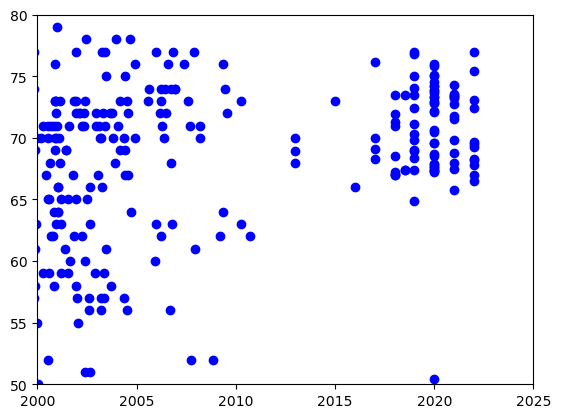

In [16]:
plt.plot(date,h0,'bo')
plt.xlim(2000,2025)
plt.ylim(50,80)

## Making plots with error bars

__Bring up the documentation on `plt.errorbar` in the below code box.__

In [25]:
?plt.errorbar

Signature:
plt.errorbar(
    x: 'float | ArrayLike',
    y: 'float | ArrayLike',
    yerr: 'float | ArrayLike | None' = None,
    xerr: 'float | ArrayLike | None' = None,
    fmt: 'str' = '',
    *,
    ecolor: 'ColorType | None' = None,
    elinewidth: 'float | None' = None,
    capsize: 'float | None' = None,
    barsabove: 'bool' = False,
    lolims: 'bool | ArrayLike' = False,
    uplims: 'bool | ArrayLike' = False,
    xlolims: 'bool | ArrayLike' = False,
    xuplims: 'bool | ArrayLike' = False,
    errorevery: 'int | tuple[int, int]' = 1,
    capthick: 'float | None' = None,
    data=None,
    **kwargs,
) -> 'ErrorbarContainer'
Docstring:
Plot y versus x as lines and/or markers with attached errorbars.

*x*, *y* define the data locations, *xerr*, *yerr* define the errorbar
sizes. By default, this draws the data markers/lines as well as the
errorbars. Use fmt='none' to draw errorbars without any data markers.

.. versionadded:: 3.7
   Caps and error lines are drawn in polar coordi

__In the below box, make a plot of H0 vs. year with error-bars given by either `errplus` or `errminus`.  Use the `fmt=` keyword to draw the points as blue circles (it uses the same format coding as `plt.plot`).  You will want to use the `yerr=` keyword.__

(50.0, 80.0)

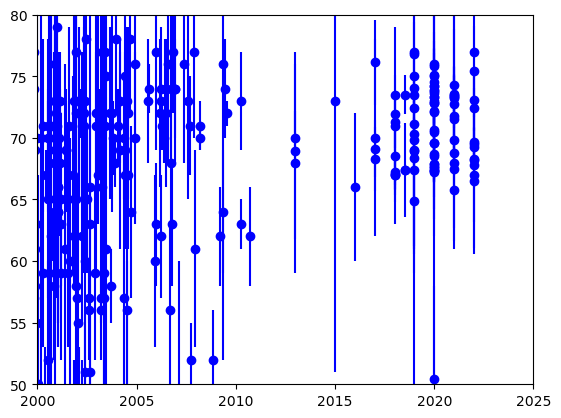

In [41]:
plt.errorbar(date,h0,yerr=errminus,fmt='bo')
# minus_error=abs(errminus)
# plus_error=abs(errplus)
# yerr=[minus_error,plus_error]
plt.xlim(2000,2025)
plt.ylim(50,80)



__Now, we want to modify the plot in the above code box to use asymmetric error bars.__  To do that, you provide a Python `list` of two arrays containg one error for each measurement; i.e., generically, `yerr = [minus_error,plus_error]` where `minus_error` is the length of the lower error bar and `plus_error` is the length of the upper.

__Also, limit the plot x range to only show results from 2000 - 2010.__

(30.0, 100.0)

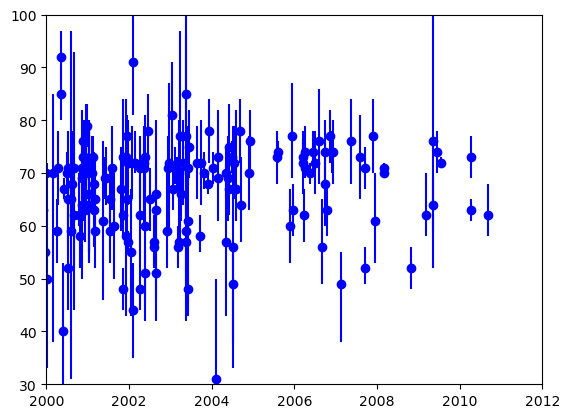

In [ ]:
plt.errorbar(date,h0,yerr=[errminus,errplus],fmt='bo')
plt.xlim(2000,2012)
plt.ylim(30,100)

## Plotting histograms of $H_0$ values

We want to compare the distributions of $H_0$ values from 1999-2001 (pre-Key Project release), 2001-2012, and 2012+.  

__In the below code box, select measurements from each era and overplot histograms using different colors for each.  Use the `bins=` and/or `range=` keywords to ensure that the same binning is used for each sample, and make sure that your binning is fine enough to be able to see the shape of the histogram (the default of 10 bins is rarely appropriate). Be sure to include a legend!__

If you read things in with pandas, you can use `np.where()` to get the indices in each array for a given date range, and then plot the corresponding values by slicing h0.iloc with those indices; e.g.:

    wh90s = np.where( np.logical_and(date > 1990, date < 2000) )
    plt.hist(h0.iloc[wh90s],bins=20)
    
Alternatively, you can use a boolean array to select the rows you want:

    is90s = np.logical_and(date > 1990, date < 2000) 
    plt.hist(h0[is90s],bins=20)

If you read things in as an astropy `Table` or `recarray`, you can use `np.where()` to get the indices, and then plot the corresponding values by slicing the h0 values with those indices; e.g.:

    wh90s = np.where( np.logical_and(date > 1990, date < 2000) )
    plt.hist(h0t[wh90s],bins=20)
    
    

(array([ 1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  3.,
        21., 16.,  9.,  8., 20.,  8.,  6.]),
 array([48.  , 49.45, 50.9 , 52.35, 53.8 , 55.25, 56.7 , 58.15, 59.6 ,
        61.05, 62.5 , 63.95, 65.4 , 66.85, 68.3 , 69.75, 71.2 , 72.65,
        74.1 , 75.55, 77.  ]),
 <BarContainer object of 20 artists>)

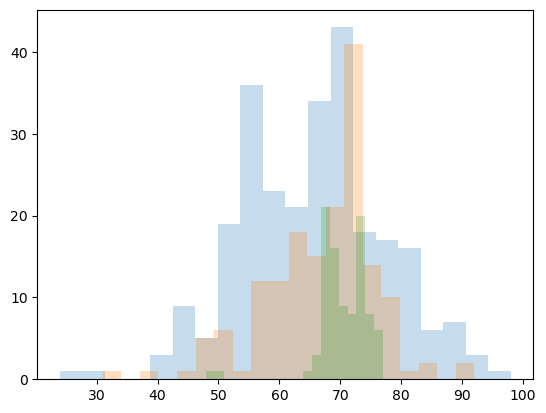

In [54]:
wh90s=np.where(np.logical_and(date>1990,date<2000))
plt.hist(h0.iloc[wh90s],bins=20,alpha=0.25)
wh10=np.where(np.logical_and(date>2000,date<2012))
plt.hist(h0.iloc[wh10],bins=20,alpha=0.25)
wh12=np.where(np.logical_and(date>2012,date<2024))
plt.hist(h0.iloc[wh12],bins=20,alpha=0.25)


# If you're waiting for other groups...

- Try exploring the recarray version of the data (`data_table`) and applying its methods.

- Matplotlib offers many customization options.  Check out http://matplotlib.org/users/customizing.html#dynamic-rc-settings for discussion of how to change the settings temporarily for a program (using `mpl.rc()`).  The example matplotlibrc file at the end of that page lists all the possible things to change; e.g. to change the linewidth (lines.linewidth in the matplotlibrc file) you would do 

    mpl.rc('lines',linewidth=2.0)
    
Try changing various line/font/etc. settings for your plots above.

A good way to help make your plots prettier is to look at example code for the plots in the matplotlib gallery, https://matplotlib.org/stable/gallery/index.html .    

# Bootstrap resampling

In Python, one way to generate bootstraps, which works with numpy arrays but __not__ pandas series, is generating an array of random index numbers (i.e., sets of indices within the orignal array), and then addressing the original array we want to make bootstraps from with the array of index numbers.  Their shapes need not match.

The easy way, though, is to use `numpy.random.choice()`.  __Check the documentation on this routine in the code box below.__

If we want a one-dimensional array of samples, the `.sample()` method of a dataframe (or series) works. However, we want 2D, as we will create a set of `nbootstraps` new samples each of length `ndata`, so we couldn't use `Dataframe.sample()` without having to loop over the number of bootstrap samples.  

Note that in general the default value of `replace=True` is what you want for bootstraps.

In [18]:
hdata=h0[date > 2001]
ndata=len(hdata)
nbootstraps=int(1E4)

# The below code would work if we used astropy, but not pandas.  
#bootidx=np.floor((random.rand(nbootstraps,ndata)*ndata))
#bootidx=bootidx.astype(int)
#hboot=hdata[bootidx]

# this works in pandas:
hboot=np.random.choice(hdata,(nbootstraps,ndata))


In the code box below, 

__1) determine the minimum and maximum values in hdata and in hboot__

__2) Plot a histogram of the values in `np.ravel(hboot)`__

__3) Determine the dimensions of hboot using `np.shape()`__

31.0 91.0
(10000, 225)


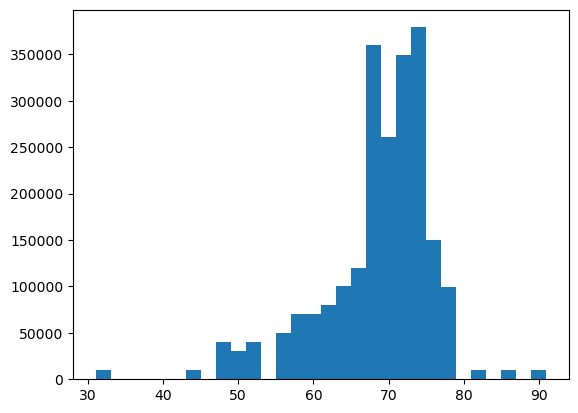

In [ ]:
print(np.min(hdata),np.max(hdata))
plt.hist(np.ravel(hboot),bins=30)
print(np.shape(hboot))

### Using the bootstrap simulations

We can, for instance, compute the standard deviation of the mean for `hdata` by determining the standard deviation of the mean values we compute from each bootstrap realization; but we could do this for any other statistic, too.  __Compare the standard deviation of the mean & of the median to what you'd expect for the standard error, using the code box below.__

In [62]:
err_predicted=np.std(hdata)/np.sqrt(ndata)

# compare to the standard deviation amongst the means, or amongst the medians, of each bootstrap sample:
means=np.zeros(nbootstraps)

# the slow way
for i in np.arange(nbootstraps):
    means[i]=np.mean(hboot[i,:])
    
# the fast way    
medians = np.median(hboot,axis=1)    
print('the mean and median of the means are',np.mean(means),'and',np.median(means))
print('The mean and median of hdata are',np.mean(hdata),'and',np.median(hdata))
print('Std of the means and medians are',np.std(means),np.std(medians))
print('median of medians',np.median(medians))


the mean and median of the means are 68.25907005333333 and 68.26697777777778
The mean and median of hdata are 68.25724444444445 and 70.0
Std of the means and medians are 0.5022444193041472 0.4851656940510118
median of medians 70.0


So, the mean of the means is really close to the real data's mean. 

__What do the distributions look like?  Plot the histograms of both means and medians and compare (use a bin size of 0.1).  Discuss with your group: why do these look different from each other?__


(array([0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        7.000e+00, 3.000e+00, 0.000e+00, 1.000e+01, 0.000e+00, 2.600e+01,
        0.000e+00, 2.300e+01, 3.700e+01, 1.070e+02, 8.030e+02, 2.440e+02,
        2.690e+02, 0.000e+00, 0.000e+00, 3.350e+02, 8.160e+02, 4.830e+02,
        1.032e+03, 0.000e+00, 4.574e+03, 0.000e+00, 0.000e+00, 2.330e+02,
        0.000e+00, 2.100e+02, 1.690e+02, 0.000e+00, 0.000e+00, 0.000e+00,
        6.060e+02, 3.000e+00, 0.000e+00, 6.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 2.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

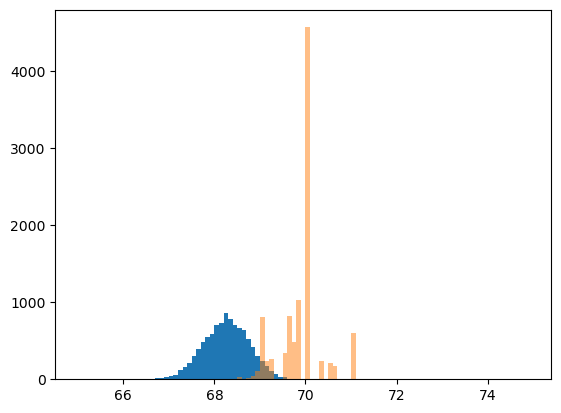

In [69]:
bins=np.arange(65,75,0.1)
plt.hist(means,bins=bins)
plt.hist(medians,bins=bins,alpha=0.5)
# plt.hist(hdata)

the median is robust to outliers.
the distribution of medians kinda looks like the original distribution?


# Percentiles and Sorting

3 examples of ways to get a 95% range for the median:

In [71]:
# use np.percentile
print( np.percentile(medians, [2.5, 97.5]) )

# use np.sort to create a sorted array
sortmedians = np.sort(medians)
print( sortmedians[int(0.025*nbootstraps)],sortmedians[int(0.975*nbootstraps)] )

#use np.argsort to get an array of indices that sort the medians array
sortidx=np.argsort(medians)
print( medians[sortidx[int(0.025*nbootstraps)]], medians[sortidx[int(0.975*nbootstraps)]] )


[69. 71.]
69.0 71.0
69.0 71.0


__Now, using one of these methods, determine a 95% confidence interval for H0 from the means of each bootstrap sample.__

In [74]:
sortmeans = np.sort(means)
print( sortmeans[int(0.025*nbootstraps)],sortmeans[int(0.975*nbootstraps)] )
sortidm=np.argsort(means)
print( means[sortidm[int(0.025*nbootstraps)]], means[sortidm[int(0.975*nbootstraps)]] )
print( np.percentile(means, [2.5, 97.5]) )

67.26946666666666 69.21568888888888
67.26946666666666 69.21568888888888
[67.26940333 69.21495222]


# Smoothed bootstraps

We can get nicer-looking distributions of bootstrap results by adding a modest amount of noise to the data generated from bootstrapping.  Example: add N(0,1) noise to our H0 bootstraps:

In [75]:
sboot=hboot+random.randn(nbootstraps,ndata)
smeans = np.mean(sboot,axis=1) 
smedians=np.median(sboot,axis=1) 

__Overplot histograms of the `medians` and `smedians` arrays using the same binning for each.  Then, determine 95% confidence regions for the smoothed mean and smoothed median, and compare to your values from above.__

[68.88955891 70.78923149]


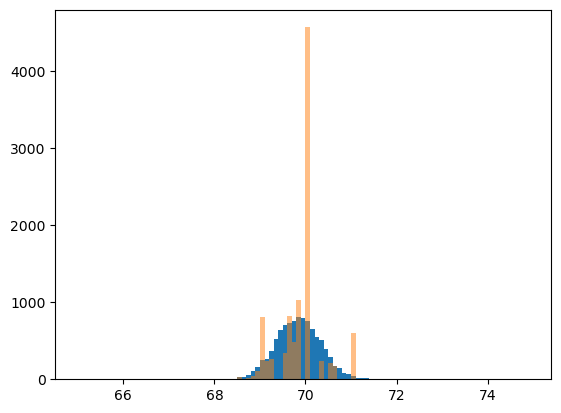

In [83]:
bins=np.arange(65,75,0.1)
plt.hist(smedians,bins=bins)
plt.hist(medians,bins=bins,alpha=0.5)
print( np.percentile(smedians, [2.5, 97.5]) )
# plt.hist(smeans,bins=bins,alpha=0.5)

(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   2.,   2.,   2.,   3.,   2.,  12.,  14.,  35.,  47.,  55.,
        123., 161., 217., 296., 395., 485., 554., 588., 702., 737., 860.,
        783., 706., 660., 637., 517., 416., 307., 238., 175., 114.,  67.,
         35.,  25.,   9.,   9.,   6.,   2.,   1.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
 array([65. , 65.1, 65.2, 65.3, 65.4, 65.5, 65.6, 65.7, 65.8, 65.9, 66. ,
        66.1, 66.2, 66.3, 66.4, 66.5, 66.6, 66.7, 66.8, 66.9, 67. , 67.1,
        67.2, 67.3, 67.4, 67.5, 67.6, 67.7, 67.8, 67.9, 68. , 68.1, 68.2,
        68.3, 68.4, 68.5, 68.6, 68.7, 68.8, 68.9, 69. , 69.1, 69.2, 69.3,
        69.4, 69.5, 69.6, 69.7, 69.8

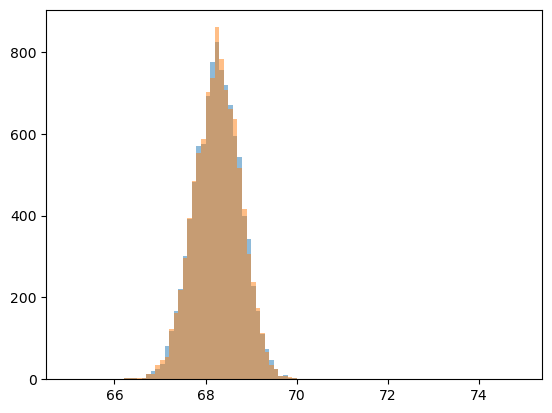

In [80]:
plt.hist(smeans,bins=bins,alpha=0.5)
plt.hist(means,bins=bins,alpha=0.5)